# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [112]:
import pandas as pd
import numpy as np
import re
from functools import reduce 
from pandas import DataFrame as DF
# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Country Rank Data
ScimEn = pd.read_excel(io="assets/scimagojr-3.xlsx")
ScimEn = ScimEn[0:15]

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [114]:
def answer_one():
    global df
    global df1
    global df2
    #MAIN Q3 - F
    ###########1###############
    #Energy Supply DataFrame
    ##drop first 8 columns
    ES = pd.read_excel(io="assets/Energy Indicators.xls")
    ES.drop('Unnamed: 0',axis=1, inplace=True)
    ES = ES.iloc[8:]
    ES = ES.reset_index()
    ES.drop('index', axis=1, inplace=True)

    ##set dataframe names as first row name
    ES.columns = ES.iloc[0,0:5]
    ES = ES.drop([0],axis=0)
    ES = ES.reset_index()
    ES.drop('index', axis=1, inplace=True)

    ##drop futile rows and columns
    ES.drop(ES.iloc[2:6].index,inplace=True)
    ES.drop([0], axis=0, inplace=True)
    ES.drop(ES.iloc[1:3].index, axis=0, inplace=True)
    ES = ES.iloc[0:228]
    ES = ES.reset_index()
    ES.drop('index', axis=1, inplace=True)
    ES.drop(ES.columns[0], axis=1, inplace=True)

    ##replace missing values with np.nan
    ES[ES == '...'] = np.nan

    ##convert 'Energy Supply' from petajoule to gigajoule
    ES['Energy Supply'] = ES['Energy Supply'] *1000000

    ##exclude numbers from 'Country' column
    #ES['Country'] = [re.sub(r'[0-9]+', '', c) for c in ES['Country']]
    ES['Country'] = [re.sub(r'[0-9]+','', c) for c in ES['Country']]

    ##rename countries
    ES['Country'] = ES['Country'].replace({"Republic of Korea": "South Korea", 
                         "United States of America": "United States",
                         "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                         "China, Hong Kong Special Administrative Region": "Hong Kong"
                         })

    ##exclude parentheses from 'Country' column
    ES['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in ES['Country']]
    ##rename column
    ES.rename({'Renewable Electricity Production': '% Renewable',
               'Energy Supply per capita': 'Energy Supply per Capita'}, axis=1, inplace=True)

    ##exclude first country
    ES.drop(0, inplace=True)
    ES = ES.reset_index()
    ES.drop('index', axis=1, inplace=True)
    ###########################
    ##############2#########
    #World Bank GDP
    GDP = pd.read_csv("assets/world_bank.csv",error_bad_lines=False)

    ##remove first 3 rows
    GDP = GDP.iloc[3:]

    #set dataframe names as first row name
    GDP.columns = GDP.iloc[0,0:]
    GDP = GDP.drop(GDP.iloc[[0]].index,axis=0)
    GDP = GDP.reset_index()
    GDP.drop('index', axis=1, inplace=True)

    ##change row names from float to int and then str (so that '1960.0' turns into '1960')
    L = list(GDP.columns[4:])
    L1 = list(map(int, L))
    L2 = list(map(str, L1))
    idx = list(GDP.columns[0:4]) + L2
    GDP.rename(columns=dict(zip(list(GDP.columns),idx)), inplace=True)

    ##renmae countries
    GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                         "Iran, Islamic Rep.": "Iran",
                         "Hong Kong SAR, China": "Hong Kong"
                         })
    ##rename column
    GDP.rename({'Country Name': 'Country'}, axis=1, inplace=True)

    ##only keep years from 2006 to next
    #GDP.drop(GDP.columns[[range(1,50)]], axis=1, inplace=True)
    #GDP.drop(GDP.columns[[-1]], axis=1, inplace=True)
    
    ##remove first two columns
    GDP.drop(GDP.columns[[range(1,4)]], axis=1, inplace=True)

    ##exclude parentheses from 'Country' column
    ##newly disabled
    #GDP['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in GDP['Country']]



    ######################
    ############3###########
    #Country Rank Data
    ScimEn = pd.read_excel(io="assets/scimagojr-3.xlsx")
    #ScimEn = ScimEn[0:15]
    ##########COMBINE##########
    data_frames = [ScimEn, ES, GDP]
    #df1 = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
       #                                         how='outer'), data_frames)
    #df1.set_index('Country', inplace=True)

    ##merge inner
    df = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                                how='inner'), data_frames) 
    df.set_index('Country', inplace=True)
    
    df1 = df.copy()
    ##merge outer (for Q2)
    df2 = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                                how='outer'), data_frames) 
    df2.set_index('Country', inplace=True)
    


    ##exclude years before 2006
    df.drop(df.columns[[range(10,56)]], axis=1, inplace=True)
    
    #select only countries with ranks 1-15
    df = df[df['Rank'] < 16]   
    
    #convert columns types to numeric (instead of str)
    for i in range (0,len(df.columns)-1):
        df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])
 
    return(df)    
    raise NotImplementedError()

In [115]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [116]:
# Cell for autograder.


#MAIN-BACKUP
###########1###############
#Energy Supply DataFrame
##drop first 8 columns
df = pd.read_excel(io="assets/Energy Indicators.xls")
df.drop('Unnamed: 0',axis=1, inplace=True)
df = df.iloc[8:]
df = df.reset_index()
df.drop('index', axis=1, inplace=True)

##set dataframe names as first row name
df.columns = df.iloc[0,0:5]
df = df.drop([0],axis=0)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)

##drop futile rows and columns
df.drop(df.iloc[2:6].index,inplace=True)
df.drop([0], axis=0, inplace=True)
df.drop(df.iloc[1:3].index, axis=0, inplace=True)
df = df.iloc[0:228]
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

##replace missing values with np.nan
df[df == '...'] = np.nan

##convert 'Energy Supply' from petajoule to gigajoule
df['Energy Supply'] = df['Energy Supply'] *1000000

##exclude numbers from 'Country' column
df['Country'] = [re.sub(r'[0-9]+', '', c) for c in df['Country']]

##rename countries
df['Country'] = df['Country'].replace({"Republic of Korea": "South Korea", 
                     "United States of America": "United States",
                     "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                     "China, Hong Kong Special Administrative Region": "Hong Kong"
                     })

##exclude parentheses from 'Country' column
df['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in df['Country']]

##rename column
df.rename({'Renewable Electricity Production': '% Renewable',
           'Energy Supply per capita': 'Energy Supply per Capita'}, axis=1, inplace=True)

##exclude first 2 countries 
df.drop(0, inplace=True)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
ES = df.copy()
###########################
##############2#########
#World Bank GDP
GDP = pd.read_csv("assets/world_bank.csv",error_bad_lines=False)

##remove first 3 rows
GDP = GDP.iloc[3:]

#set dataframe names as first row name
GDP.columns = GDP.iloc[0,0:]
GDP = GDP.drop(GDP.iloc[[0]].index,axis=0)
GDP = GDP.reset_index()
GDP.drop('index', axis=1, inplace=True)

##change row names from float to int and then str (so that '1960.0' turns into '1960')
L = list(GDP.columns[4:])
L1 = list(map(int, L))
L2 = list(map(str, L1))
idx = list(GDP.columns[0:4]) + L2
GDP.rename(columns=dict(zip(list(GDP.columns),idx)), inplace=True)

##renmae countries
GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                     "Iran, Islamic Rep.": "Iran",
                     "Hong Kong SAR, China": "Hong Kong"
                     })
##rename column
GDP.rename({'Country Name': 'Country'}, axis=1, inplace=True)

##only keep years from 2006 to next
GDP.drop(GDP.columns[[range(1,50)]], axis=1, inplace=True)
#GDP.drop(GDP.columns[[-1]], axis=1, inplace=True)


##exclude parentheses from 'Country' column
GDP['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in GDP['Country']]



######################
############3###########
#Country Rank Data
ScimEn = pd.read_excel(io="assets/scimagojr-3.xlsx")
ScimEn = ScimEn[0:15]
##########COMBINE##########
com1 = pd.merge(ScimEn, ES, how='outer', on='Country')
com2 = pd.merge(com1, GDP, how='outer', on='Country')
com2.set_index('Country', inplace=True)
com3 = com2[com2['Rank'] < 16]   
diff = com2.shape[0] - com3.shape[0]
diff *= com2.shape[1]

def answer_one():
    # YOUR CODE HERE
    ###########1###############
    #Energy Supply DataFrame
    ##drop first 8 columns
    df = pd.read_excel(io="assets/Energy Indicators.xls")
    df.drop('Unnamed: 0',axis=1, inplace=True)
    df = df.iloc[8:]
    df = df.reset_index()
    df.drop('index', axis=1, inplace=True)

    ##set dataframe names as first row name
    df.columns = df.iloc[0,0:5]
    df = df.drop([0],axis=0)
    df = df.reset_index()
    df.drop('index', axis=1, inplace=True)

    ##drop futile rows and columns
    df.drop(df.iloc[2:6].index,inplace=True)
    df.drop([0], axis=0, inplace=True)
    df.drop(df.iloc[1:3].index, axis=0, inplace=True)
    df = df.iloc[0:228]
    df = df.reset_index()
    df.drop('index', axis=1, inplace=True)
    df.drop(df.columns[0], axis=1, inplace=True)

    ##replace missing values with np.nan
    df[df == '...'] = np.nan

    ##convert 'Energy Supply' from petajoule to gigajoule
    df['Energy Supply'] = df['Energy Supply'] *1000000

    ##exclude numbers from 'Country' column
    df['Country'] = [re.sub(r'[0-9]+', '', c) for c in df['Country']]

    ##rename countries
    df['Country'] = df['Country'].replace({"Republic of Korea": "South Korea", 
                         "United States of America": "United States",
                         "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                         "China, Hong Kong Special Administrative Region": "Hong Kong"
                         })

    ##exclude parentheses from 'Country' column
    df['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in df['Country']]

    ##rename column
    df.rename({'Renewable Electricity Production': '% Renewable',
               'Energy Supply per capita': 'Energy Supply per Capita'}, axis=1, inplace=True)
    ES = df.copy()
    ###########################
    ##############2#########
    #World Bank GDP
    GDP = pd.read_csv("assets/world_bank.csv",error_bad_lines=False)

    ##remove first 3 rows
    GDP = GDP.iloc[3:]

    #set dataframe names as first row name
    GDP.columns = GDP.iloc[0,0:]
    GDP = GDP.drop(GDP.iloc[[0]].index,axis=0)
    GDP = GDP.reset_index()
    GDP.drop('index', axis=1, inplace=True)

    ##change row names from float to int and then str (so that '1960.0' turns into '1960')
    L = list(GDP.columns[4:])
    L1 = list(map(int, L))
    L2 = list(map(str, L1))
    idx = list(GDP.columns[0:4]) + L2
    GDP.rename(columns=dict(zip(list(GDP.columns),idx)), inplace=True)

    ##renmae countries
    GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                         "Iran, Islamic Rep.": "Iran",
                         "Hong Kong SAR, China": "Hong Kong"
                         })
    ##rename column
    GDP.rename({'Country Name': 'Country'}, axis=1, inplace=True)

    ##only keep years from 2006 to next
    GDP.drop(GDP.columns[[range(1,50)]], axis=1, inplace=True)
    #GDP.drop(GDP.columns[[-1]], axis=1, inplace=True)


    ##exclude parentheses from 'Country' column
    GDP['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in GDP['Country']]
    ######################
    ############3###########
    #Country Rank Data
    ScimEn = pd.read_excel(io="assets/scimagojr-3.xlsx")
    ScimEn = ScimEn[0:15]
    ##########COMBINE##########
    com1 = pd.merge(ScimEn, ES, how='outer', on='Country')
    com2 = pd.merge(com1, GDP, how='outer', on='Country')
    com2.set_index('Country', inplace=True)
    com2 = com2[com2['Rank'] < 16]   
    return(com2)    

In [117]:
#MAIN Q2
###########1###############
#Energy Supply DataFrame
##drop first 8 columns
ES = pd.read_excel(io="assets/Energy Indicators.xls")
ES.drop('Unnamed: 0',axis=1, inplace=True)
ES = ES.iloc[8:]
ES = ES.reset_index()
ES.drop('index', axis=1, inplace=True)

##set dataframe names as first row name
ES.columns = ES.iloc[0,0:5]
ES = ES.drop([0],axis=0)
ES = ES.reset_index()
ES.drop('index', axis=1, inplace=True)

##drop futile rows and columns
ES.drop(ES.iloc[2:6].index,inplace=True)
ES.drop([0], axis=0, inplace=True)
ES.drop(ES.iloc[1:3].index, axis=0, inplace=True)
ES = ES.iloc[0:228]
ES = ES.reset_index()
ES.drop('index', axis=1, inplace=True)
ES.drop(ES.columns[0], axis=1, inplace=True)

##replace missing values with np.nan
ES[ES == '...'] = np.nan

##convert 'Energy Supply' from petajoule to gigajoule
ES['Energy Supply'] = ES['Energy Supply'] *1000000

##exclude numbers from 'Country' column
#df['Country'] = [re.sub(r'[0-9]+', '', c) for c in df['Country']]
ES['Country'] = [re.sub(r'[0-9]+','', c) for c in ES['Country']]

##rename countries
ES['Country'] = df['Country'].replace({"Republic of Korea": "South Korea", 
                     "United States of America": "United States",
                     "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                     "China, Hong Kong Special Administrative Region": "Hong Kong"
                     })

##exclude parentheses from 'Country' column
ES['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in ES['Country']]
#dfb = df.copy()
##rename column
ES.rename({'Renewable Electricity Production': '% Renewable',
           'Energy Supply per capita': 'Energy Supply per Capita'}, axis=1, inplace=True)

##exclude first country
ES.drop(0, inplace=True)
ES = ES.reset_index()
ES.drop('index', axis=1, inplace=True)
#ES = df.copy()
###########################
##############2#########
#World Bank GDP
GDP = pd.read_csv("assets/world_bank.csv",error_bad_lines=False)

##remove first 3 rows
GDP = GDP.iloc[3:]

#set dataframe names as first row name
GDP.columns = GDP.iloc[0,0:]
GDP = GDP.drop(GDP.iloc[[0]].index,axis=0)
GDP = GDP.reset_index()
GDP.drop('index', axis=1, inplace=True)

##change row names from float to int and then str (so that '1960.0' turns into '1960')
L = list(GDP.columns[4:])
L1 = list(map(int, L))
L2 = list(map(str, L1))
idx = list(GDP.columns[0:4]) + L2
GDP.rename(columns=dict(zip(list(GDP.columns),idx)), inplace=True)

##renmae countries
GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                     "Iran, Islamic Rep.": "Iran",
                     "Hong Kong SAR, China": "Hong Kong"
                     })
##rename column
GDP.rename({'Country Name': 'Country'}, axis=1, inplace=True)

##only keep years from 2006 to next
#GDP.drop(GDP.columns[[range(1,50)]], axis=1, inplace=True)
#GDP.drop(GDP.columns[[-1]], axis=1, inplace=True)


##exclude parentheses from 'Country' column
##newly disabled
#GDP['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in GDP['Country']]



######################
############3###########
#Country Rank Data
ScimEn = pd.read_excel(io="assets/scimagojr-3.xlsx")
#ScimEn = ScimEn[0:15]
##########COMBINE##########
data_frames = [ScimEn, ES, GDP]
df1 = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                            how='outer'), data_frames)
df1.set_index('Country', inplace=True)

df2 = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                            how='inner'), data_frames) 
df2.set_index('Country', inplace=True)


##exclude years before 2006
#df2.drop(df2.columns[[range(13,59)]], axis=1, inplace=True)

#df2 = df2[df2['Rank'] < 16]  
diff = df1.shape[0] - df2.shape[0]
diff *= df1.shape[1]

KeyError: 'Country'

In [ ]:
ES[ES['Country'] == 'China, Hong Kong Special Administrative Region']

In [ ]:
ES[ES['Country'] == 'Hong Kong']

In [ ]:
#"Korea, Rep.": "South Korea", 
#                     "Iran, Islamic Rep.": "Iran",
#                     "Hong Kong SAR, China": "Hong Kong"

In [ ]:
##check if there is still number in dfb (df in a certain level)
for i,c in enumerate(ES['Country']):
    r = re.findall('[0-9]*', c)
    if all(i == '' for i in r) == False:
        print(i,r)


In [ ]:
for i,c in enumerate(ES['Country']):
    r = re.findall('[w]r\s$', c)
    if all(i == '' for i in r) == False:
        print(i,r)


In [ ]:
a = ['', '', '', '', '', '', '', '', '']

In [118]:
all(i == '' for i in a)

True

In [119]:
#GDP.to_csv('GDP-wrangled.csv')
#ES.to_csv('ES-wrangled.csv')
#ScimEn.to_csv('ScimEn-wrangled.csv')

In [120]:
#check = answer_one() == df2
#np.size(check) - np.count_nonzero(check)

In [121]:
df1.shape

(162, 66)

In [122]:
df2.shape

(318, 66)

In [123]:
df1.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [124]:
df2.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '1960', '1961', '1962',
       '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [125]:
df1

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.7549,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.571,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.2328,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.6005,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.2887,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.9454,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.9015,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.9691,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.0203,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [126]:
df2

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
China,1.0,127050.0,126767.0,597237.0,411683.0,4.70,138.0,127191000000,93,19.7549,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2.0,96661.0,94747.0,792274.0,265436.0,8.20,230.0,90838000000,286,11.571,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3.0,30504.0,30287.0,223024.0,61554.0,7.31,134.0,18984000000,149,10.2328,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4.0,20944.0,20357.0,206091.0,37874.0,9.84,139.0,7920000000,124,10.6005,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5.0,18534.0,18301.0,34266.0,12422.0,1.85,57.0,30709000000,214,17.2887,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6.0,17899.0,17620.0,215003.0,40930.0,12.01,149.0,10431000000,296,61.9454,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7.0,17027.0,16831.0,140566.0,27426.0,8.26,126.0,13261000000,165,17.9015,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8.0,15005.0,14841.0,128763.0,37209.0,8.58,115.0,33195000000,26,14.9691,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9.0,13153.0,12973.0,130632.0,28601.0,9.93,114.0,10597000000,166,17.0203,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [127]:
df1.loc['South Korea']

Rank                          10
Documents                  11983
Citable documents          11923
Citations                 114675
Self-citations             22595
                        ...     
2011                  1.1348e+12
2012                 1.16081e+12
2013                 1.19443e+12
2014                 1.23434e+12
2015                 1.26658e+12
Name: South Korea, Length: 66, dtype: object

In [128]:
df1.loc['United States']

Rank                           2
Documents                  96661
Citable documents          94747
Citations                 792274
Self-citations            265436
                        ...     
2011                  1.5204e+13
2012                 1.55422e+13
2013                 1.57737e+13
2014                 1.61566e+13
2015                 1.65486e+13
Name: United States, Length: 66, dtype: object

In [129]:
df1.loc['United Kingdom']

Rank                           4
Documents                  20944
Citable documents          20357
Citations                 206091
Self-citations             37874
                        ...     
2011                 2.45091e+12
2012                 2.47981e+12
2013                 2.53337e+12
2014                 2.60564e+12
2015                 2.66633e+12
Name: United Kingdom, Length: 66, dtype: object

In [130]:
df1.loc['Hong Kong']

Rank                          31
Documents                   2448
Citable documents           2436
Citations                  34453
Self-citations              3959
                        ...     
2011                 2.39646e+11
2012                 2.43721e+11
2013                 2.51208e+11
2014                 2.57776e+11
2015                 2.63861e+11
Name: Hong Kong, Length: 66, dtype: object

In [131]:
df1.loc['Iran']

Rank                          13
Documents                   8896
Citable documents           8819
Citations                  57470
Self-citations             19125
                        ...     
2011                 4.85331e+11
2012                 4.53257e+11
2013                 4.44593e+11
2014                 4.63903e+11
2015                         NaN
Name: Iran, Length: 66, dtype: object

In [132]:
317 - 162

155

In [133]:
diff

NameError: name 'diff' is not defined

In [134]:
ES.head(10)

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
0,Andorra,9000000,121,88.6957
1,Afghanistan,321000000,10,78.6693
2,Albania,102000000,35,100
3,Algeria,1959000000,51,0.55101
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9000000,121,88.6957
6,Angola,642000000,27,70.9091
7,Anguilla,2000000,136,0
8,Antigua and Barbuda,8000000,84,0
9,Argentina,3378000000,79,24.0645


In [135]:
ES.tail(10)

,Country,Energy Supply,Energy Supply per capita,Renewable Electricity Production
218,United States Virgin Islands,NaN,NaN,0
219,Uruguay,196000000,58,71.605
220,Uzbekistan,1798000000,62,21.3284
221,Vanuatu,3000000,10,14.7059
222,Venezuela (Bolivarian Republic of),2871000000,95,67.8345
223,Viet Nam,2554000000,28,45.3215
224,Wallis and Futuna Islands,0,26,0
225,Yemen,344000000,13,0
226,Zambia,400000000,26,99.7147
227,Zimbabwe,480000000,32,52.5361


In [136]:
print(ES.shape)

(228, 4)


In [137]:
GDP.head(10)

NameError: name 'GDP' is not defined

In [ ]:
GDP.tail(10)

In [138]:
GDP.shape

NameError: name 'GDP' is not defined

In [ ]:
ScimEn.head(10)

In [ ]:
ScimEn.tail(10)

In [ ]:
ScimEn.shape

### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [ ]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [ ]:
def answer_two():
    # YOUR CODE HERE
    #MAIN
    #df2 = df2[df2['Rank'] < 16]  
    diff = df2.shape[0] - df1.shape[0]
    #diff *= df1.shape[1]
    return diff
    raise NotImplementedError()

In [ ]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


#MAIN Q3 -backup
###########1###############
#Energy Supply DataFrame
##drop first 8 columns
df = pd.read_excel(io="assets/Energy Indicators.xls")
df.drop('Unnamed: 0',axis=1, inplace=True)
df = df.iloc[8:]
df = df.reset_index()
df.drop('index', axis=1, inplace=True)

##set dataframe names as first row name
df.columns = df.iloc[0,0:5]
df = df.drop([0],axis=0)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)

##drop futile rows and columns
df.drop(df.iloc[2:6].index,inplace=True)
df.drop([0], axis=0, inplace=True)
df.drop(df.iloc[1:3].index, axis=0, inplace=True)
df = df.iloc[0:228]
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

##replace missing values with np.nan
df[df == '...'] = np.nan

##convert 'Energy Supply' from petajoule to gigajoule
df['Energy Supply'] = df['Energy Supply'] *1000000

##exclude numbers from 'Country' column
#df['Country'] = [re.sub(r'[0-9]+', '', c) for c in df['Country']]
df['Country'] = [re.sub(r'[0-9]+','', c) for c in df['Country']]

##rename countries
df['Country'] = df['Country'].replace({"Republic of Korea": "South Korea", 
                     "United States of America": "United States",
                     "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                     "China, Hong Kong Special Administrative Region": "Hong Kong"
                     })

##exclude parentheses from 'Country' column
df['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in df['Country']]
dfb = df.copy()
##rename column
df.rename({'Renewable Electricity Production': '% Renewable',
           'Energy Supply per capita': 'Energy Supply per Capita'}, axis=1, inplace=True)

##exclude first country
df.drop(0, inplace=True)
df = df.reset_index()
df.drop('index', axis=1, inplace=True)
ES = df.copy()
###########################
##############2#########
#World Bank GDP
GDP = pd.read_csv("assets/world_bank.csv",error_bad_lines=False)

##remove first 3 rows
GDP = GDP.iloc[3:]

#set dataframe names as first row name
GDP.columns = GDP.iloc[0,0:]
GDP = GDP.drop(GDP.iloc[[0]].index,axis=0)
GDP = GDP.reset_index()
GDP.drop('index', axis=1, inplace=True)

##change row names from float to int and then str (so that '1960.0' turns into '1960')
L = list(GDP.columns[4:])
L1 = list(map(int, L))
L2 = list(map(str, L1))
idx = list(GDP.columns[0:4]) + L2
GDP.rename(columns=dict(zip(list(GDP.columns),idx)), inplace=True)

##renmae countries
GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                     "Iran, Islamic Rep.": "Iran",
                     "Hong Kong SAR, China": "Hong Kong"
                     })
##rename column
GDP.rename({'Country Name': 'Country'}, axis=1, inplace=True)

##only keep years from 2006 to next
#GDP.drop(GDP.columns[[range(1,50)]], axis=1, inplace=True)
#GDP.drop(GDP.columns[[-1]], axis=1, inplace=True)


##exclude parentheses from 'Country' column
##newly disabled
#GDP['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in GDP['Country']]



######################
############3###########
#Country Rank Data
ScimEn = pd.read_excel(io="assets/scimagojr-3.xlsx")
#ScimEn = ScimEn[0:15]
##########COMBINE##########
data_frames = [ScimEn, ES, GDP]
#df1 = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
   #                                         how='outer'), data_frames)
#df1.set_index('Country', inplace=True)

df = reduce(lambda  left,right: pd.merge(left,right,on=['Country'],
                                            how='inner'), data_frames) 
df.set_index('Country', inplace=True)


##exclude years before 2006
df.drop(df.columns[[range(13,59)]], axis=1, inplace=True)

df = df[df['Rank'] < 16]  

#calcualte mean of columns corresponding to years
df['avgGDP'] = sorted(df[df.columns[13:]].mean(axis=1), reverse=True)



#MAIN Q3-backup2

##############2#########
#World Bank GDP
GDP = pd.read_csv("assets/world_bank.csv",error_bad_lines=False)

##remove first 3 rows
GDP = GDP.iloc[3:]

#set dataframe names as first row name
GDP.columns = GDP.iloc[0,0:]
GDP = GDP.drop(GDP.iloc[[0]].index,axis=0)
GDP = GDP.reset_index()
GDP.drop('index', axis=1, inplace=True)

##change row names from float to int and then str (so that '1960.0' turns into '1960')
L = list(GDP.columns[4:])
L1 = list(map(int, L))
L2 = list(map(str, L1))
idx = list(GDP.columns[0:4]) + L2
GDP.rename(columns=dict(zip(list(GDP.columns),idx)), inplace=True)

##renmae countries
GDP['Country Name'] = GDP['Country Name'].replace({"Korea, Rep.": "South Korea", 
                     "Iran, Islamic Rep.": "Iran",
                     "Hong Kong SAR, China": "Hong Kong"
                     })
##rename column
GDP.rename({'Country Name': 'Country'}, axis=1, inplace=True)

##only keep years from 2006 to next
GDP.drop(GDP.columns[[range(1,50)]], axis=1, inplace=True)
#GDP.drop(GDP.columns[[-1]], axis=1, inplace=True)
GDP.set_index('Country', inplace=True)

##exclude parentheses from 'Country' column
##newly disabled
#GDP['Country'] = [re.sub('\ \([\w ]*\)*', '', c) for c in GDP['Country']]


##drop rows that are all na
#GDP.dropna(axis = 0, how = 'all', inplace = True)


GDP['avgGDP'] = GDP[GDP.columns].mean(axis=1)
#GDP = GDP.dropna()



GDP.sort_values('avgGDP', ascending=False, inplace=True)

avgGDP = GDP['avgGDP'][0:15]

#avgGDP = avgGDP.sort_values(ascending=False)
avgGDP



### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [ ]:
def answer_three():
    global dfa
    dfa = df.copy()
    
    ##averaging over columns of years of GDP
    dfa['avgGDP'] = dfa[dfa.columns[10:]].mean(axis=1)
    #GDP = GDP.dropna()


    #sort dataframe by average GDP (descending)
    dfa.sort_values('avgGDP', ascending=False, inplace=True)

    #select the top 15
    avgGDP = dfa['avgGDP'][0:15]

    return avgGDP
    raise NotImplementedError()

In [ ]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


In [139]:
dfa

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP
Country,,,,,,,,,,,,,,,,,,,,,
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,3.493025e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,2.681725e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12
Brazil,15,8668,8596,60702,14396,7.00,86,12149000000,59,69.648030,...,1.957118e+12,2.056809e+12,2.054215e+12,2.208872e+12,2.295245e+12,2.339209e+12,2.409740e+12,2.412231e+12,2.319423e+12,2.189794e+12
Italy,11,10964,10794,111850,26661,10.20,106,6530000000,109,33.667230,...,2.234627e+12,2.211154e+12,2.089938e+12,2.125185e+12,2.137439e+12,2.077184e+12,2.040871e+12,2.033868e+12,2.049316e+12,2.120175e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.769297e+12


In [140]:
sixth = dfa.iloc[6]
change = sixth['2015'] - sixth['2006']
sixth

Rank                        1.500000e+01
Documents                   8.668000e+03
Citable documents           8.596000e+03
Citations                   6.070200e+04
Self-citations              1.439600e+04
Citations per document      7.000000e+00
H index                     8.600000e+01
Energy Supply               1.214900e+10
Energy Supply per Capita    5.900000e+01
% Renewable                 6.964803e+01
2006                        1.845080e+12
2007                        1.957118e+12
2008                        2.056809e+12
2009                        2.054215e+12
2010                        2.208872e+12
2011                        2.295245e+12
2012                        2.339209e+12
2013                        2.409740e+12
2014                        2.412231e+12
2015                        2.319423e+12
avgGDP                      2.189794e+12
Name: Brazil, dtype: float64

### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [141]:
def answer_four():
    # YOUR CODE HERE
    sixth = dfa.iloc[5]
    change = sixth['2015'] - sixth['2006']
    return change
    raise NotImplementedError()

In [142]:
# Cell for autograder.


In [143]:
df.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [144]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [145]:
df.agg('Energy Supply per Capita').mean()

157.6

### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [146]:
def answer_five():
    # YOUR CODE HERE
    mean = df.agg('Energy Supply per Capita').mean()
    return mean
    raise NotImplementedError()

In [147]:
# Cell for autograder.


In [148]:
df.iloc[df['% Renewable'].values.argmax()]

Rank                        1.500000e+01
Documents                   8.668000e+03
Citable documents           8.596000e+03
Citations                   6.070200e+04
Self-citations              1.439600e+04
Citations per document      7.000000e+00
H index                     8.600000e+01
Energy Supply               1.214900e+10
Energy Supply per Capita    5.900000e+01
% Renewable                 6.964803e+01
2006                        1.845080e+12
2007                        1.957118e+12
2008                        2.056809e+12
2009                        2.054215e+12
2010                        2.208872e+12
2011                        2.295245e+12
2012                        2.339209e+12
2013                        2.409740e+12
2014                        2.412231e+12
2015                        2.319423e+12
Name: Brazil, dtype: float64

In [149]:
df.iloc[df['% Renewable'].values.argmax()]

Rank                        1.500000e+01
Documents                   8.668000e+03
Citable documents           8.596000e+03
Citations                   6.070200e+04
Self-citations              1.439600e+04
Citations per document      7.000000e+00
H index                     8.600000e+01
Energy Supply               1.214900e+10
Energy Supply per Capita    5.900000e+01
% Renewable                 6.964803e+01
2006                        1.845080e+12
2007                        1.957118e+12
2008                        2.056809e+12
2009                        2.054215e+12
2010                        2.208872e+12
2011                        2.295245e+12
2012                        2.339209e+12
2013                        2.409740e+12
2014                        2.412231e+12
2015                        2.319423e+12
Name: Brazil, dtype: float64

In [150]:
maxval = df['% Renewable'].values.max()
maxindex = df.iloc[df['% Renewable'].values.argmax()].name
tup = (maxindex, maxval)
tup

('Brazil', 69.64803)

In [151]:
tup[0]

'Brazil'

In [152]:
df['% Renewable']

Country
China                 19.754910
United States         11.570980
Japan                 10.232820
United Kingdom        10.600470
Russian Federation    17.288680
Canada                61.945430
Germany               17.901530
India                 14.969080
France                17.020280
South Korea            2.279353
Italy                 33.667230
Spain                 37.968590
Iran                   5.707721
Australia             11.810810
Brazil                69.648030
Name: % Renewable, dtype: float64

### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [153]:
def answer_six():
    # YOUR CODE HERE
    maxval = df['% Renewable'].values.max()
    maxindex = df.iloc[df['% Renewable'].values.argmax()].name
    tup = (maxindex, maxval)
    return tup
    raise NotImplementedError()

In [154]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


In [155]:
df.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

In [156]:
df['ratio'] = df['Self-citations'] / df['Citations']

In [157]:
df['ratio']

Country
China                 0.689313
United States         0.335031
Japan                 0.275997
United Kingdom        0.183773
Russian Federation    0.362517
Canada                0.190369
Germany               0.195111
India                 0.288973
France                0.218943
South Korea           0.197035
Italy                 0.238364
Spain                 0.194299
Iran                  0.332782
Australia             0.171939
Brazil                0.237159
Name: ratio, dtype: float64

In [158]:
maxval = df['ratio'].values.max()
maxindex = df.iloc[df['ratio'].values.argmax()].name
tup = (maxindex, maxval)
tup

('China', 0.6893126179389422)

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [159]:
def answer_seven():
    # YOUR CODE HERE
    df['ratio'] = df['Self-citations'] / df['Citations']
    maxval = df['ratio'].values.max()
    maxindex = df.iloc[df['ratio'].values.argmax()].name
    tup = (maxindex, maxval)
    return tup
    raise NotImplementedError()

In [160]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


In [161]:
i=len(df.columns) - 1
df[df.columns[i]]

Country
China                 0.689313
United States         0.335031
Japan                 0.275997
United Kingdom        0.183773
Russian Federation    0.362517
Canada                0.190369
Germany               0.195111
India                 0.288973
France                0.218943
South Korea           0.197035
Italy                 0.238364
Spain                 0.194299
Iran                  0.332782
Australia             0.171939
Brazil                0.237159
Name: ratio, dtype: float64

In [162]:
#plot9()

### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [163]:
def answer_eight():
    # YOUR CODE HERE
    global dfp
    dfp = df.copy()
    dfp['PopEst'] = dfp['Energy Supply'] / dfp['Energy Supply per Capita']
    maxindex = dfp.iloc[dfp['PopEst'].values.argmax()].name
    return maxindex
    raise NotImplementedError()

In [164]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


In [165]:
dfp = df.copy()
dfp['PopEst'] = dfp['Energy Supply'] / dfp['Energy Supply per Capita']
maxindex = dfp.iloc[dfp['PopEst'].values.argmax()].name
maxindex

'China'

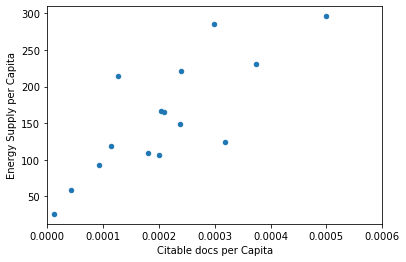

In [166]:
plot9()

In [167]:

import scipy.stats as stats
dfp['Citable docs per Capita'] = dfp['Citable documents'] / dfp['PopEst']
corr, pval=stats.pearsonr(dfp["Citable docs per Capita"],dfp["Energy Supply per Capita"])
corr

0.7940010435442942

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [168]:
def answer_nine():
    # YOUR CODE HERE
    import scipy.stats as stats
    dfp['Citable docs per Capita'] = dfp['Citable documents'] / dfp['PopEst']
    corr, pval=stats.pearsonr(dfp["Citable docs per Capita"],dfp["Energy Supply per Capita"])
    return corr
    raise NotImplementedError()

In [169]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [170]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


In [171]:
dftemp = pd.DataFrame(
    np.array([[1, 2, 3], [4, 5, np.nan], [7, 8, 9], [3, 2, np.nan], [5, 6, np.nan]]), 
    columns=['a', 'b', 'c'])
dftemp

,a,b,c
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,7.0,8.0,9.0
3,3.0,2.0,NaN
4,5.0,6.0,NaN


In [172]:
dftemp['c'] = dftemp.apply(
    lambda row: row['a']*row['b'] if np.isnan(row['c']) else row['c'],
    axis=1
)
dftemp

,a,b,c
0,1.0,2.0,3.0
1,4.0,5.0,20.0
2,7.0,8.0,9.0
3,3.0,2.0,6.0
4,5.0,6.0,30.0


In [173]:
df.columns

Index(['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'PopEst',
       'Citable docs per Capita'],
      dtype='object')

In [174]:
df['% Renewable'].median()

17.02028

In [175]:
med = df['% Renewable'].median()
df['rwcheck'] = np.nan
flag = lambda x: 1 if x['% Renewable'] >= med else 0 
df.apply(flag, axis=1)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
dtype: int64

### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [176]:
def answer_ten():
    # YOUR CODE HERE
    med = df['% Renewable'].median()
    flag = lambda x: 1 if x['% Renewable'] >= med else 0 
    df['rwcheck'] = df.apply(flag, axis=1)
    HighRenew = df['rwcheck']
    HighRenew.name = 'HighRenew'
    return df['rwcheck']
    raise NotImplementedError()

In [177]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


In [178]:
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64



cont = lambda x: CD[x.name]
df['cont'] = df.apply(cont,axis=1)
df['cont']

In [179]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
CD = ContinentDict.copy()

In [180]:
dfc = pd.DataFrame(dfp.reset_index()[['PopEst', 'Country']])
cont = lambda x: CD[x['Country']]
dfc['cont'] = dfc.apply(cont, axis=1)

In [181]:
dfc.drop('Country', axis=1, inplace=True)

In [182]:
dfc

,PopEst,cont
0,1.367645e+09,Asia
1,3.176154e+08,North America
2,1.274094e+08,Asia
3,6.387097e+07,Europe
4,1.435000e+08,Europe
5,3.523986e+07,North America
6,8.036970e+07,Europe
7,1.276731e+09,Asia
8,6.383735e+07,Europe
9,4.980543e+07,Asia


In [183]:
dfc.groupby('cont').count()

,PopEst
cont,
Asia,5
Australia,1
Europe,6
North America,2
South America,1


In [184]:
gpcont = dfc.groupby('cont').agg(['size', 'sum', 'mean', 'std'])
gpcont

PopEst                                          
                size           sum          mean           std
cont                                                          
Asia               5  2.898666e+09  5.797333e+08  6.790979e+08
Australia          1  2.331602e+07  2.331602e+07           NaN
Europe             6  4.579297e+08  7.632161e+07  3.464767e+07
North America      2  3.528552e+08  1.764276e+08  1.996696e+08
South America      1  2.059153e+08  2.059153e+08           NaN

In [185]:
gpcont.columns = gpcont.columns.droplevel()

In [186]:
gpcont

,size,sum,mean,std
cont,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [187]:
gpcont.index

Index(['Asia', 'Australia', 'Europe', 'North America', 'South America'], dtype='object', name='cont')

In [188]:
gpcont.columns

Index(['size', 'sum', 'mean', 'std'], dtype='object')

In [189]:
CD['China']

'Asia'

In [190]:
cats = pd.Categorical(list(ContinentDict.values()))
cats

[Asia, North America, Asia, Europe, Europe, ..., Europe, Europe, Asia, Australia, South America]
Length: 15
Categories (5, object): [Asia, Australia, Europe, North America, South America]

### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [191]:
def answer_eleven():
    # YOUR CODE HERE
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    CD = ContinentDict.copy()
    #creating a dataframe containing only population and countries
    dfc = pd.DataFrame(dfp.reset_index()[['PopEst', 'Country']])
    #creating a function that finds the continent of a given country(x) in continent dictionary (CD)
    cont = lambda x: CD[x['Country']]
    #creating a column filled with each country's continent
    dfc['Continent'] = dfc.apply(cont, axis=1)
    dfc.drop('Country', axis=1, inplace=True)
    gpcont = dfc.groupby('Continent').agg(['size', 'sum', 'mean', 'std'])
    #removing PopEst from multilevel indexing
    gpcont.columns = gpcont.columns.droplevel()
    return gpcont
    raise NotImplementedError()

In [192]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


In [193]:
answer_eleven()

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [205]:

# YOUR CODE HERE
ContinentDict  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}
CD = ContinentDict.copy()
bins = pd.cut(df['% Renewable'], 5)
#creating a dataframe from renewable bins
dfc = pd.DataFrame(pd.cut(df['% Renewable'], 5))
#creating a function that finds the continent of a given country(x) in continent dictionary (CD)
cont = lambda x: CD[x.name]
#creating a column filled with each country's continent
dfc['Continent'] = dfc.apply(cont, axis=1)
#dfc.drop('Country', axis=1, inplace=True)
gpcont = dfc.groupby('% Renewable')
#removing PopEst from multilevel indexing
#gpcont.columns = gpcont.columns.droplevel()
#gpont

In [209]:
dfc.reset_index(inplace=True)
dfc

,Country,% Renewable,Continent
0,China,"(15.753, 29.227]",Asia
1,United States,"(2.212, 15.753]",North America
2,Japan,"(2.212, 15.753]",Asia
3,United Kingdom,"(2.212, 15.753]",Europe
4,Russian Federation,"(15.753, 29.227]",Europe
5,Canada,"(56.174, 69.648]",North America
6,Germany,"(15.753, 29.227]",Europe
7,India,"(2.212, 15.753]",Asia
8,France,"(15.753, 29.227]",Europe
9,South Korea,"(2.212, 15.753]",Asia


In [212]:
grouped = dfc.groupby(['Continent', '% Renewable'])
grouped.count()

Country
Continent     % Renewable              
Asia          (2.212, 15.753]       4.0
              (15.753, 29.227]      1.0
              (29.227, 42.701]      NaN
              (42.701, 56.174]      NaN
              (56.174, 69.648]      NaN
Australia     (2.212, 15.753]       1.0
              (15.753, 29.227]      NaN
              (29.227, 42.701]      NaN
              (42.701, 56.174]      NaN
              (56.174, 69.648]      NaN
Europe        (2.212, 15.753]       1.0
              (15.753, 29.227]      3.0
              (29.227, 42.701]      2.0
              (42.701, 56.174]      NaN
              (56.174, 69.648]      NaN
North America (2.212, 15.753]       1.0
              (15.753, 29.227]      NaN
              (29.227, 42.701]      NaN
              (42.701, 56.174]      NaN
              (56.174, 69.648]      1.0
South America (2.212, 15.753]       NaN
              (15.753, 29.227]      NaN
              (29.227, 42.701]      NaN
              (42.701, 56.174]      NaN
              (56.174, 69.648]      1.0

In [216]:
res = grouped.count().dropna()
res

Country
Continent     % Renewable              
Asia          (2.212, 15.753]       4.0
              (15.753, 29.227]      1.0
Australia     (2.212, 15.753]       1.0
Europe        (2.212, 15.753]       1.0
              (15.753, 29.227]      3.0
              (29.227, 42.701]      2.0
North America (2.212, 15.753]       1.0
              (56.174, 69.648]      1.0
South America (56.174, 69.648]      1.0

Country
Continent     % Renewable              
Asia          (2.212, 15.753]       4.0
              (15.753, 29.227]      1.0
Australia     (2.212, 15.753]       1.0
Europe        (2.212, 15.753]       1.0
              (15.753, 29.227]      3.0
              (29.227, 42.701]      2.0
North America (2.212, 15.753]       1.0
              (56.174, 69.648]      1.0
South America (56.174, 69.648]      1.0

In [223]:
pd.Series(res['Country'], index=res.index)

Continent      % Renewable     
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: Country, dtype: float64

### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [ ]:
def answer_twelve():
    # YOUR CODE HERE
    raise NotImplementedError()


In [67]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


NameError: name 'answer_twelve' is not defined

### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [ ]:
def answer_thirteen():
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")